In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from pandas.io.json import json_normalize

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [4]:
 df=pd.read_csv('D:\data.csv')

In [5]:
df.to_csv('D:\data.csv', index=False)

In [6]:
df.sample(5)

,_id,city,fields.cityName,fields.comment,fields.discountPrice,fields.distance,fields.features,fields.featuresNew,fields.fromName,fields.h5_url,...,fields.sold365,fields.soldRecent,fields.soldRecentNum,fields.subTitle,fields.tagList,fields.title,fields.titleTagInfos,fields.type,src,trip_main_busness_type
29797,5cc71aaa64eeab7d62a590f9,广州,NaN,0.0,353.00,NaN,"[{'key': None, 'text': '18:00前可订今日票', 'color':...","[{'key': None, 'text': '18:00前可订今日票', 'color':...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售7笔,NaN,0,NaN,[],随订随用|广州长隆飞鸟乐园+广州长隆野生动物世界,[],NaN,mix,vocation
51313,5cc71bf864eeab7d62a5e505,上海,NaN,1.0,120.00,NaN,"[{'key': None, 'text': '08:00前可订今日票', 'color':...","[{'key': None, 'text': '08:00前可订今日票', 'color':...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售4笔,NaN,0,NaN,[],上海野生动物园大门票（含猛兽巴士游览）,[],NaN,mix,vocation
48263,5cc71bd064eeab7d62a5d91b,北京,NaN,8.0,49.99,NaN,"[{'key': None, 'text': '16:00前可订今日票', 'color':...","[{'key': None, 'text': '16:00前可订今日票', 'color':...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售117笔,月售36笔,35,NaN,[],[电子票]北京怀柔黄花城水长城门票 北京黄花城水长城门票,[],NaN,mix,vocation
29100,5cc71aa064eeab7d62a58e40,广州,NaN,4.0,56.00,NaN,"[{'key': None, 'text': '08:56前可订今日票', 'color':...","[{'key': None, 'text': '08:56前可订今日票', 'color':...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售54笔,月售26笔,26,NaN,[],【新春特惠】广州 岭南印象园 星空馆套票 岭南印象园票+星空馆,[],NaN,mix,vocation
19877,5cc719f664eeab7d62a56a39,九江,NaN,7.0,41.80,NaN,"[{'key': None, 'text': '平均1分钟出票', 'color': Non...","[{'key': None, 'text': '平均1分钟出票', 'color': Non...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售76笔,月售11笔,11,NaN,[],【便捷入园】江西省九江市 庐山石门涧 大门票（山下入园）,[],NaN,mix,vocation


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Data columns (total 31 columns):
_id                       54675 non-null object
city                      54675 non-null object
fields.cityName           0 non-null float64
fields.comment            50187 non-null float64
fields.discountPrice      54675 non-null float64
fields.distance           0 non-null float64
fields.features           54675 non-null object
fields.featuresNew        50187 non-null object
fields.fromName           0 non-null float64
fields.h5_url             50187 non-null object
fields.itemId             54675 non-null int64
fields.itemTotalScore     50187 non-null float64
fields.latitude           54675 non-null float64
fields.longitude          54675 non-null float64
fields.native_url         0 non-null float64
fields.p_score            54675 non-null int64
fields.pc_url             54675 non-null object
fields.picUrl             54675 non-null object
fields.price              54675 non-

In [8]:
df.columns

Index(['_id', 'city', 'fields.cityName', 'fields.comment',
       'fields.discountPrice', 'fields.distance', 'fields.features',
       'fields.featuresNew', 'fields.fromName', 'fields.h5_url',
       'fields.itemId', 'fields.itemTotalScore', 'fields.latitude',
       'fields.longitude', 'fields.native_url', 'fields.p_score',
       'fields.pc_url', 'fields.picUrl', 'fields.price', 'fields.scm',
       'fields.shortInfo', 'fields.sold365', 'fields.soldRecent',
       'fields.soldRecentNum', 'fields.subTitle', 'fields.tagList',
       'fields.title', 'fields.titleTagInfos', 'fields.type', 'src',
       'trip_main_busness_type'],
      dtype='object')

In [9]:
df.iloc[55]

_id                                                5cc718a064eeab7d62a51ccb
city                                                                    石家庄
fields.cityName                                                         NaN
fields.comment                                                            0
fields.discountPrice                                                  116.9
fields.distance                                                         NaN
fields.features           [{'key': None, 'text': '18:00前可订今日票', 'color':...
fields.featuresNew        [{'key': None, 'text': '18:00前可订今日票', 'color':...
fields.fromName                                                         NaN
fields.h5_url             https://h5.m.taobao.com/trip/travel-detail/ind...
fields.itemId                                                  588857206136
fields.itemTotalScore                                                     0
fields.latitude                                                           0
fields.longi

In [10]:
col_keep = ['city', 'fields.comment', 'fields.discountPrice', 'fields.features', 'fields.itemId','fields.itemTotalScore', 'fields.latitude', 'fields.longitude', 'fields.price','fields.shortInfo', 'fields.sold365', 'fields.soldRecentNum', 'fields.tagList','fields.title', 'trip_main_busness_type']

In [11]:
df=df[col_keep]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Data columns (total 15 columns):
city                      54675 non-null object
fields.comment            50187 non-null float64
fields.discountPrice      54675 non-null float64
fields.features           54675 non-null object
fields.itemId             54675 non-null int64
fields.itemTotalScore     50187 non-null float64
fields.latitude           54675 non-null float64
fields.longitude          54675 non-null float64
fields.price              54675 non-null float64
fields.shortInfo          50187 non-null object
fields.sold365            32193 non-null object
fields.soldRecentNum      54675 non-null int64
fields.tagList            54675 non-null object
fields.title              54675 non-null object
trip_main_busness_type    54675 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 6.3+ MB


In [13]:
df.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
31429,清远,0.0,99.00,"[{'key': None, 'text': '23:00前可订今日票', 'color':...",582872179981,0.0,0.0,0.0,99.0,清远,已售8笔,2,[],【当天可订】清远佛冈金龟泉温泉门票家庭亲子套票3大3小电子票,vocation
42088,成都,1.0,92.99,"[{'key': None, 'text': '15:30前可订今日票', 'color':...",573092654573,5.0,0.0,0.0,98.0,成都,已售15笔,2,[],【2张起订】四川成都环球中心天堂岛海洋乐园门票 环海洋水世界,vocation
25838,武汉,291.0,61.50,"[{'key': None, 'text': '17:50前可订今日票', 'color':...",536025922146,4.9,0.0,0.0,61.5,武汉,已售2354笔,575,[],当天可订立即入园 】 武汉黄鹤楼门票 可定汉秀知音号两江夜游票,vocation
47252,西宁,0.0,45.00,"[{'key': None, 'text': '16:10前可订今日票', 'color':...",573633053386,0.0,0.0,0.0,45.0,西宁,已售4笔,0,[],青海 西宁 青藏高原自然博物馆 大门票,vocation
48058,北京,3.0,200.00,"[{'key': None, 'text': '平均1分钟出票', 'color': Non...",576605892120,4.7,0.0,0.0,200.0,北京,已售34笔,6,[],莫莉幻想莫莉乐园8次门票,vocation


In [14]:
df.drop_duplicates(subset='fields.itemId', inplace=True)

In [15]:
df.loc[df['fields.comment'].isnull(),'fields.comment']=np.nan
df['fields.comment']=df['fields.comment'].astype(float)

In [16]:
df['fields.discountPrice']=df['fields.discountPrice'].astype(float)

df['fields.itemId']=df['fields.itemId'].astype(int)

df['fields.price']=df['fields.price'].astype(float)

df['fields.soldRecentNum']=df['fields.soldRecentNum'].astype(int)


In [17]:
 df.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
44120,丽江,0.0,520.0,"[{'key': None, 'text': '出票2小时后可用', 'color': No...",-2131255792,0.0,0.0000,0.000,520.0,丽江,NaN,0,[],玉龙雪山进山费+中索道+环保车+来回接送+蓝月谷+三宝+餐 丽江游,vocation
46792,酒泉,0.0,478.0,"[{'key': None, 'text': '18:00前可订今日票', 'color':...",183471303,0.0,0.0000,0.000,478.0,酒泉,NaN,0,[],【官方】敦煌旅游鸣沙山月牙泉门票+敦煌丝路花雨(A区)演出套票,vocation
36864,贺州,0.0,40.0,"[{'key': None, 'text': '14:25前可订今日票', 'color':...",-1980128058,0.0,0.0000,0.000,40.0,贺州,NaN,0,[],广西贺州紫云仙境景区 紫云仙境门票 电子票,vocation
40181,三亚,NaN,158.0,"[{'key': '一句话描述', 'text': '国家旅游局评为中国“四十佳”旅游景点之...",17684,NaN,18.2321,109.511,158.0,NaN,NaN,0,[],三亚旭阳户外潜水俱乐部,scenic
15695,黄山,0.0,175.0,"[{'key': None, 'text': '出票1小时后可用', 'color': No...",-1432358170,0.0,0.0000,0.000,175.0,黄山,NaN,0,[],【快速入园】黄山西递景区门票+夹溪河漂流票 黄山 西递 夹溪河,vocation


In [18]:

df['fields.sold365'].sample(5)

47605     已售77笔
49330     已售29笔
51666    已售707笔
48422    已售665笔
53821       NaN
Name: fields.sold365, dtype: object

In [19]:
df['fields.tagList'].sample(5)

44500    []
17501    []
6602     []
37068    []
17740    []
Name: fields.tagList, dtype: object

In [20]:
city_data=pd.read_csv('D:\city_data.csv')

In [21]:
city_data.head()

,city,province
0,石家庄,河北省
1,邯郸,河北省
2,唐山,河北省
3,保定,河北省
4,秦皇岛,河北省


In [22]:
data_final=df.merge(city_data,on='city')

In [23]:
data_final.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type,province
12673,丽水,49.0,28.9,"[{'key': None, 'text': '12:50前可订今日票', 'color':...",416690048,5.0,0.0,0.0,36.0,丽水,已售461笔,22,[],当天可订 丽水古堰画乡门票+双程船票 古堰画乡门票 电子票,vocation,浙江省
44744,上海,6.0,68.0,"[{'key': None, 'text': '16:00前可订今日票', 'color':...",-1888589979,5.0,0.0,0.0,68.0,上海,已售86笔,66,[],樱花季 上海顾村公园门票+自然谷恐龙乐园套票+2选1活动项目HP,vocation,上海市
1122,承德,96.0,80.0,"[{'key': None, 'text': '17:00前可订今日票', 'color':...",-959850703,4.9,0.0,0.0,80.0,承德,已售1054笔,6,[],承德小布达拉宫门票 普陀宗乘之庙 须弥福寿之庙 外八庙 承德旅游,vocation,河北省
1238,沧州,0.0,30.0,"[{'key': None, 'text': '出票后立即可用', 'color': Non...",535840835,0.0,0.0,0.0,30.0,沧州,NaN,0,[],沧州清水湾汗蒸广场 单人浴资票,vocation,河北省
7609,苏州,1.0,78.0,"[{'key': None, 'text': '23:30前可订今日票', 'color':...",-1913042360,5.0,0.0,0.0,78.0,苏州,已售13笔,3,[],【当天可定】苏州四季悦温泉门票 苏州乐园四季悦水游村 夜场票,vocation,江苏省


In [24]:
data_final.to_csv('data_clean.csv',index=False)

In [25]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48537 entries, 0 to 48536
Data columns (total 16 columns):
city                      48537 non-null object
fields.comment            44643 non-null float64
fields.discountPrice      48537 non-null float64
fields.features           48537 non-null object
fields.itemId             48537 non-null int32
fields.itemTotalScore     44643 non-null float64
fields.latitude           48537 non-null float64
fields.longitude          48537 non-null float64
fields.price              48537 non-null float64
fields.shortInfo          44643 non-null object
fields.sold365            28057 non-null object
fields.soldRecentNum      48537 non-null int32
fields.tagList            48537 non-null object
fields.title              48537 non-null object
trip_main_busness_type    48537 non-null object
province                  48537 non-null object
dtypes: float64(6), int32(2), object(8)
memory usage: 5.9+ MB


In [26]:
count_top12=data_final['fields.shortInfo'].value_counts()[:12]

from pyecharts import Funnel

funnel = Funnel("旅游选择最多的前12个城市", width = 800,height=600)
funnel.add("", count_top12.index, count_top12.values, legend_top=30,
           xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True,
          )
funnel

In [27]:
count_province_top10 = data_final['province'].value_counts()

In [28]:
count_province_top10

广东省         4943
浙江省         4688
海南省         3907
江苏省         3889
山东省         2853
福建省         2818
广西壮族自治区     2391
湖北省         2106
北京市         1658
安徽省         1610
四川省         1548
云南省         1541
辽宁省         1480
河北省         1403
上海市         1358
河南省         1313
江西省         1255
陕西省         1104
重庆市          955
香港           923
湖南省          778
澳门           644
黑龙江省         604
甘肃省          467
天津市          430
贵州省          368
山西省          364
宁夏回族自治区      305
吉林省          271
内蒙古自治区       151
台湾           142
西藏自治区        141
新疆维吾尔自治区      90
青海省           39
Name: province, dtype: int64

In [29]:
province = [pro.replace("省", "") for pro in list(count_province_top10.index)]
province = [pro.replace("市", "") for pro in province]

In [30]:
province = ['广东','浙江','海南','江苏','山东','福建','广西','湖北','北京','安徽','四川','云南',
            '辽宁','河北','上海','河南','江西','陕西','重庆','香港','湖南','澳门','黑龙江','甘肃',
            '天津','贵州','山西','宁夏','吉林','内蒙古','台湾','西藏',
            '新疆','青海']

In [31]:
from pyecharts import Map


map = Map("全国各省份旅游选择数量图", width=600, height=600)
map.add(
    "",
    province,
    count_province_top10.values,
    maptype="china",
    is_visualmap=True,
    visual_text_color="#000",
    visual_range=[0, 5000]
)
map

In [32]:
city_sale_top10 = data_final.groupby('fields.shortInfo')['fields.soldRecentNum'].sum().nlargest(10)

In [33]:
from pyecharts import Bar

bar = Bar("最近一个月售出门票Top10城市", width = 700,height=500)
bar.add("", city_sale_top10.index, city_sale_top10.values, is_stack=True, 
       xaxis_label_textsize=18, yaxis_label_textsize=14, is_label_show=True,
       xaxis_rotate=20)
bar

In [34]:
data_final.groupby('fields.shortInfo')['fields.soldRecentNum'].sum().nlargest(10)

fields.shortInfo
杭州    170324
上海    130630
北京     64395
香港     55927
广州     45164
无锡     38172
常州     32728
苏州     32124
三亚     31851
南京     29745
Name: fields.soldRecentNum, dtype: int32

In [35]:
city_favor_count = data_final[(data_final['fields.itemTotalScore'] > 0)&
                              (data_final['fields.comment'] > 30)
                             ].groupby('fields.shortInfo')['fields.itemTotalScore'].count()

In [36]:
city_qual = list(city_favor_count[city_favor_count > 30].index)

In [37]:
city_favor_top10 = data_final[(data_final['fields.itemTotalScore'] > 0)&
                              (data_final['fields.comment'] > 30)&
                              (data_final['fields.shortInfo'].isin(city_qual))
                             ].groupby('fields.shortInfo')['fields.itemTotalScore'].mean().nlargest(20)

In [38]:
from pyecharts import WordCloud


name, value = city_favor_top10.index, city_favor_top10.values*10-30
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 80])
wordcloud

In [39]:
data_final.sort_values(by='fields.soldRecentNum', 
                      ascending=False)[:12][['fields.title', 'fields.soldRecentNum']]

,fields.title,fields.soldRecentNum
44567,上海迪士尼度假区,227123
8162,灵隐飞来峰,119349
8285,【当天可订 官方品质】杭州西湖灵隐飞来峰（不含灵隐寺） 门票,117729
46880,香港迪士尼乐园,75092
42479,故宫博物院,50138
25585,广州长隆野生动物世界,41234
29091,珠海长隆海洋王国,34822
14184,九华山,29984
44571,上海野生动物园,25642
25587,广州长隆国际大马戏,25421


In [40]:
most_popular = ['灵隐飞来峰', '上海迪士尼', '香港迪士尼', '广州长隆', '故宫博物院',
               '珠海长隆', '九华山', '上海野生动物园', '东方明珠', '乌镇']
most_popular_values = [119349+117729, 227123, 75092, 41234+25421, 50138,
                      34822, 29984, 25642, 24243, 19557]

bar = Bar("最热门的10个景点", width = 700,height=600)
bar.add("", most_popular, most_popular_values, is_stack=True, 
       xaxis_label_textsize=16, yaxis_label_textsize=14, is_label_show=True,
       xaxis_rotate=25)
bar

In [41]:
df.sample(2)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
24828,洛阳,4.0,277.99,"[{'key': None, 'text': '最早可定明日票', 'color': Non...",-2015048057,5.0,0.0,0.0,277.99,洛阳,已售53笔,0,[],洛阳老君山门票+中灵往返索道+峰林索道 河南栾川老君山套票,vocation
23699,泰安,0.0,110.00,"[{'key': None, 'text': '出票后立即可用', 'color': Non...",-1698126341,0.0,0.0,0.0,110.00,泰安,NaN,0,[],liu lao gen 泰安,vocation


In [42]:
def get_top1(df):
    return df.head(1)

In [43]:
province_top1 = data_final.sort_values(by=['province', 'fields.itemTotalScore', 'fields.soldRecentNum'], 
                      ascending=False).groupby('province').apply(get_top1)[['fields.title', 'fields.soldRecentNum', 'fields.itemTotalScore']].reset_index()
province_top1.drop(columns = 'level_1', inplace=True)
province_top1.rename(columns={'province':'省份', 'fields.title':'项目名', 
                             'fields.soldRecentNum':'销售数量', 'fields.itemTotalScore':'评分'}, 
                    inplace=True)
province_top1

,省份,项目名,销售数量,评分
0,上海市,✅上海迪士尼乐门票 上海迪士尼乐园门票1日票 迪斯尼,9022,5.0
1,云南省,昆明青鱼湾水上乐园门票 青鱼湾【现买现用·秒出票】一票通玩,543,5.0
2,内蒙古自治区,【超值体验】内蒙古旅游鄂尔多斯草原演绎套票,16,5.0
3,北京市,【官方直营】北京古北水镇国际旅游度假区全天门票-散客全票,4100,5.0
4,台湾,雄狮旅游 台湾台北国立故宫博物院门票二维码电子票儿童免票,123,5.0
5,吉林省,I【自动出票】吉林长春伪满皇宫博物院门票 博物馆门票,125,5.0
6,四川省,✅【即买即用】 成都熊猫基地门票 大熊猫繁育研地究基地大门票,5491,5.0
7,天津市,【官方门票】天津方特欢乐世界门票 刷身份证入园,481,5.0
8,宁夏回族自治区,l【当天可订】 宁夏银川镇北堡西部影视城大门票 华夏西部影城,351,5.0
9,安徽省,【当天可订】宏村门票 安徽黄山宏村优惠票 宏村团队 黄山旅游,3070,5.0


In [44]:
data_final[(data_final['fields.soldRecentNum']>100)&
          (data_final['fields.itemTotalScore']<4.5)&
          (data_final['fields.itemTotalScore']>0)][['fields.shortInfo', 'fields.title', 'fields.soldRecentNum', 'fields.itemTotalScore']]

,fields.shortInfo,fields.title,fields.soldRecentNum,fields.itemTotalScore
2545,大连,【领券立减】大连二〇三樱花园大门票旅顺203樱花成人票扫码入园,118,4.3
7124,无锡,【当天可定】无锡善卷洞门票善卷洞含游船联票大门票成人电子票,760,4.2
8317,杭州,浙江杭州临安风之谷景区门票 户外昌化风之谷门票 杭州接送跟车,199,4.3
22782,武汉,【汉口粤汉码头登船】武汉两江游览船票B线（不含餐）夜游长江游,109,4.3
26939,深圳,ZY【当天可定即定即用】深圳观澜山水田园娱乐套票A 含景区大门票,155,3.8
29856,佛山,顺德长鹿农庄门票 休博园 大门票+游乐金+动物园 单人票/双人票,1001,4.4
29877,佛山,长鹿农庄门票休博园大门票 套票动物园2大2小（不含矿洞海洋馆）,210,4.3
40353,西安,陕西 西安 西安城墙景区 大门票+电子导览,221,4.4
42576,北京,北京昌平第七届北京农业嘉年华大门票 农业嘉年华门票 成人票,112,4.4
46919,香港,Dm香港迪士尼乐园门票1日迪斯尼香港旅游自由行景点电子票不刷单,261,4.3


In [45]:
df.sample(2)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
51839,上海,0.0,33.9,"[{'key': None, 'text': '16:00前可订今日票', 'color':...",-197976772,0.0,0.0,0.0,33.9,上海,已售2笔,0,[],【随买随用】上海大观园 全天票 自动出票 2张减3元,vocation
1604,晋城,0.0,115.0,"[{'key': None, 'text': '最早可定明日票', 'color': Non...",-1089443077,0.0,0.0,0.0,115.0,晋城,NaN,0,[],【无需换票，快速入园】山西晋城皇城相府大门票皇城相府成人票,vocation


In [46]:
data_final['discount'] = np.round((1 - (data_final['fields.price'] - 
                               data_final['fields.discountPrice'])/data_final['fields.price'])*10, 1)

In [47]:
dis_data = data_final.sort_values(by='discount')[['fields.discountPrice',
                                                            'fields.price',
                                                            'discount',
                                                            'fields.title',
                                                            'fields.shortInfo']]

In [48]:
dis_data.head(15)

,fields.discountPrice,fields.price,discount,fields.title,fields.shortInfo
28979,13.5,50.00,2.7,ZM【当天可定】广东 东莞南社明清古村落 成人儿童老人观光大门票,东莞
22713,180.0,630.00,2.9,【大学生3人特惠】武汉海昌极地海洋公园门票 海洋世界含萌宠乐园,武汉
29456,598.0,1980.00,3.0,【598元/10次卡】超值钜惠 珠海海泉湾海洋温泉10次卡 可4人使用,珠海
37355,18.0,53.10,3.4,【双人特价 电子票】成都大熊猫基地门票成都大熊猫繁育研究基地,成都
27530,34.5,100.00,3.4,ZY【提前1小时下单】广东 清远田野绿世界 成人儿童老人大门票,清远
30308,36.0,100.00,3.6,ZM【当天可定】广东 阳江闸坡大角湾景区 成人1日景区大门票,阳江
26931,60.0,166.50,3.6,即买即用 索道+缆车】 深圳东部华侨城大侠谷门票 大峡谷亲子家庭,深圳
1004,49.9,135.00,3.7,当日可订 河北 秦皇岛 沙雕海洋乐园门票 沙雕大世界大门票,秦皇岛
30549,20.0,52.99,3.8,【 即买即用】南宁园博园门票 第十二届园博会园博园门票,南宁
30541,21.4,55.00,3.9,【 即买即用】南宁园博园门票 第十二届园博会园博园门票,南宁


In [49]:
dis_data[dis_data['discount']<7].to_csv('discount.csv', index=False)

d:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 150.0)

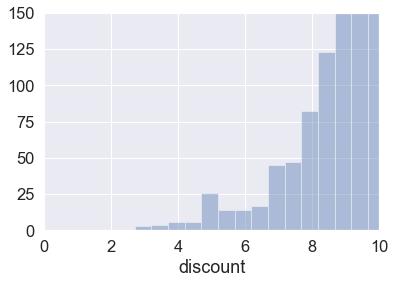

In [50]:
sns.set(font_scale=1.5)
g = sns.distplot(dis_data['discount'], kde=False)
g.set_xlim(0, 10)
g.set_ylim(0, 150)

In [51]:
dis_data[dis_data['discount']<7].groupby('fields.shortInfo')['fields.title'].count().nlargest(5)

fields.shortInfo
桂林    16
上海    12
香港    10
三亚     7
深圳     6
Name: fields.title, dtype: int64

In [68]:
data_final.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type,province,discount
13527,黄山,2.0,80.0,"[{'key': None, 'text': '18:00前可订今日票', 'color':...",846313031,5.0,0.0,0.0,80.0,黄山,已售16笔,0,[],【立即取票】新安江滨水旅游区日游船票+球幕影院票 黄山新安江,vocation,安徽省,10.0
11925,金华,0.0,110.0,"[{'key': None, 'text': '最早可定明日票', 'color': Non...",-1970444947,0.0,0.0,0.0,110.0,金华,已售6笔,0,[],金华 金华双龙风景旅游区 大门票,vocation,浙江省,10.0
22278,安阳,39.0,29.0,"[{'key': None, 'text': '23:59前可订今日票', 'color':...",1212771147,4.4,0.0,0.0,29.0,安阳,已售380笔,0,[],河南安阳岳飞庙门票 旅游景点门票 电子票景区取票 自由行岳飞庙,vocation,河南省,10.0
44538,天津,0.0,44.0,"[{'key': None, 'text': '15:30前可订今日票', 'color':...",-1132134035,0.0,0.0,0.0,44.0,天津,NaN,0,[],天津 张学良故居 大门票lxn000kk,vocation,天津市,10.0
6050,常州,0.0,170.0,"[{'key': None, 'text': '08:00前可订今日票', 'color':...",-472121993,0.0,0.0,0.0,170.0,常州,NaN,0,[],江苏常州 淹城春秋乐园门票 快速入园 无需换票 官方电子票,vocation,江苏省,10.0


In [59]:
level = ['A','AA','AAA','4A景区','5A景区']

In [69]:
level_data = data_final.groupby('fields.tagList')['fields.price'].mean()

In [70]:
data_final.groupby('fields.tagList')['fields.price'].mean()

fields.tagList
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       143.050142
[{'text': '4A景区', 'icon': None, 'borderColor': '#FCE9B8', 'textColor': '#FCA500', 'bgColor': None, 'pormotion': False, 'className': None, 'tagType': {'name': 'NONE'}}, {'text': '今日可用', 'icon': None, 'borderColor': '#FCE9B8', 'textColor': '#FCA500', 'bgColor': None, 'pormotion': False, 'className': None, 'tag

In [71]:
level_data

fields.tagList
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       143.050142
[{'text': '4A景区', 'icon': None, 'borderColor': '#FCE9B8', 'textColor': '#FCA500', 'bgColor': None, 'pormotion': False, 'className': None, 'tagType': {'name': 'NONE'}}, {'text': '今日可用', 'icon': None, 'borderColor': '#FCE9B8', 'textColor': '#FCA500', 'bgColor': None, 'pormotion': False, 'className': None, 'tag

In [73]:
bar = Bar("各级别景区的门票价格", width = 800,height=600)
bar.add("", level_data.index, np.round(level_data.values,0), is_stack=True, 
       xaxis_label_textsize=18, yaxis_label_textsize=14, is_label_show=True)
bar